# Project 1: SAT & ACT Analysis

## Problem Statement

Our team has been tracking the statewide participation of SAT between 2017 and 2018. In this report, I will present my findings and recommendations on how to improve the participation rate of SAT. 

Though College board is a not-for-profit organisation, it is necessary to identify target states where we can focus resources on given the circumstances that SAT is facing tough competition from the ACT.  

The below analysis is carried out to identify target states. 

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [258]:
#Imports:

from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

In [107]:
sat_2017 = pd.read_csv('data/sat_2017.csv')

act_2017 = pd.read_csv('data/act_2017.csv')

#### 2. Display Data


In [108]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [109]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data


The two dataframes show the participate rate of SAT and ACT in 50 states in U.S, and the average scores in each section.

SAT comprises 2 sections: Reading and Writing, Math. The total score is the sum of the 2 section scores. 

ACT comprises 4 sections: Englihs, Math, Reading, and Science. The composisite score is the average of the scaled scores for the 4 sections. 


#### 4a. Does the data look complete? 

Yes, the data looks complete. There are no missing values in any columns in both dataframes. 

When describing the act_2017 dataframe, the column of composite is missing. After checking, it is due to the error in the original csv file: in row 11 Wyoming state, Composite = 20.2x - I guess it's a typo here. Apart from this error, the data looks complete. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)


#### For SAT subtest: 

- minimum possible value: 200

- maximum possible value: 800

#### For SAT test: 

- minimum possible value: 400

- maximum possible value: 1600


#### For ACT subtest:

- minimum possible value: 1

- maximum possible value: 36

#### 4c. Fix any errors you identified


In [110]:
sat_2017.sort_values('Math', ascending=False)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
23,Minnesota,3%,644,651,1295
49,Wisconsin,3%,642,649,1291
15,Iowa,2%,641,635,1275
25,Missouri,3%,640,631,1271
16,Kansas,4%,632,628,1260
27,Nebraska,3%,629,625,1253
34,North Dakota,2%,635,621,1256
17,Kentucky,4%,631,616,1247
44,Utah,3%,624,614,1238
24,Mississippi,2%,634,607,1242


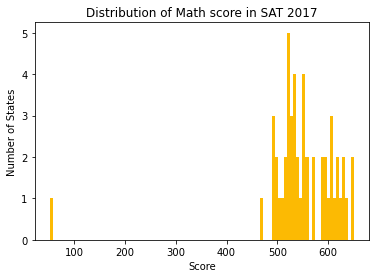

In [111]:
sat_2017.Math.plot(kind='hist', bins=100, color='#fcba03')

plt.ylabel('Number of States')
plt.xlabel('Score')
plt.title('Distribution of Math score in SAT 2017')

plt.show()

### Error identified in sat_2017

The average Math score in Maryland is 52, which is lower than the minimum possible value - possibly data entry error. 

External source(SAT Score Averages by State, 2017 and 2018):
http://ipsr.ku.edu/ksdata/ksah/education/6ed16.pdf

The actual Average Math Score in Maryland is 524.

In [112]:
sat_2017.at[20,'Math']= 524

### In act_2017, similar error is identified too.

In [113]:
act_2017.sort_values('Science', ascending=False)

,State,Participation,English,Math,Reading,Science,Composite
30,New Hampshire,18%,25.4,25.1,26.0,24.9,25.5
22,Massachusetts,29%,25.4,25.3,25.9,24.7,25.4
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
33,New York,31%,23.8,24.0,24.6,23.9,24.2
23,Michigan,29%,24.1,23.7,24.5,23.8,24.1
20,Maine,8%,24.2,24.0,24.8,23.7,24.3
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2
40,Rhode Island,21%,24.0,23.3,24.7,23.4,24.0


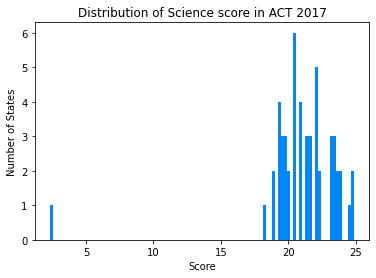

In [114]:
act_2017.Science.plot(kind='hist', bins=100, color='#0586f7')

plt.ylabel('Number of States')
plt.xlabel('Score')
plt.title('Distribution of Science score in ACT 2017')

plt.show()

The average Science score in Maryland is 2.3 only, which is much lower than the average score comparing to other states. 

External source (Average ACT Scores by State Graduating Class 2017):
https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf

The actual Average Science Score in Maryland is 23.2.

In [115]:
act_2017.at[21,'Science']= 23.2

#### 5. What are your data types? 

In [378]:
sat_2017.dtypes

state                      object
sat_participation_17      float64
sat_reading_writing_17      int64
sat_math_17                 int64
sat_total_17                int64
dtype: object

In [117]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In sat_2017, Participation should be type int or float, not object. 

In act_2017, Particpation and Composite should be type int or float, not object. 

#### 6. Fix Incorrect Data Types

In [118]:
#code
def to_float(x):
    try:
        out = float(x.replace('%',''))
    except:
        out = x
    return out

In the original csv file: in row 11 Wyoming state, Composite = 20.2x. 

In [379]:
def to_float2(x):
    try:
        out = float(x.replace('x',''))
    except:
        out = x
    return out

In [128]:
sat_2017['Participation'].apply(to_float)

0       5.0
1      38.0
2      30.0
3       3.0
4      53.0
5      11.0
6     100.0
7     100.0
8     100.0
9      83.0
10     61.0
11     55.0
12     93.0
13      9.0
14     63.0
15      2.0
16      4.0
17      4.0
18      4.0
19     95.0
20     69.0
21     76.0
22    100.0
23      3.0
24      2.0
25      3.0
26     10.0
27      3.0
28     26.0
29     96.0
30     70.0
31     11.0
32     67.0
33     49.0
34      2.0
35     12.0
36      7.0
37     43.0
38     65.0
39     71.0
40     50.0
41      3.0
42      5.0
43     62.0
44      3.0
45     60.0
46     65.0
47     64.0
48     14.0
49      3.0
50      3.0
Name: Participation, dtype: float64

In [131]:
act_2017['Participation'].apply(to_float)

0      60.0
1     100.0
2      65.0
3      62.0
4     100.0
5      31.0
6     100.0
7      31.0
8      18.0
9      32.0
10     73.0
11     55.0
12     90.0
13     38.0
14     93.0
15     35.0
16     67.0
17     73.0
18    100.0
19    100.0
20      8.0
21     28.0
22     29.0
23     29.0
24    100.0
25    100.0
26    100.0
27    100.0
28     84.0
29    100.0
30     18.0
31     34.0
32     66.0
33     31.0
34    100.0
35     98.0
36     75.0
37    100.0
38     40.0
39     23.0
40     21.0
41    100.0
42     80.0
43    100.0
44     45.0
45    100.0
46     29.0
47     29.0
48     29.0
49     69.0
50    100.0
51    100.0
Name: Participation, dtype: float64

In [132]:
act_2017['Composite'].apply(to_float2)

0     21.0
1     19.2
2     19.8
3     19.7
4     19.4
5     22.8
6     20.8
7     25.2
8     24.1
9     24.2
10    19.8
11    21.4
12    19.0
13    22.3
14    21.4
15    22.6
16    21.9
17    21.7
18    20.0
19    19.5
20    24.3
21    23.6
22    25.4
23    24.1
24    21.5
25    18.6
26    20.4
27    20.3
28    21.4
29    17.8
30    25.5
31    23.9
32    19.7
33    24.2
34    19.1
35    20.3
36    22.0
37    19.4
38    21.8
39    23.7
40    24.0
41    18.7
42    21.8
43    19.8
44    20.7
45    20.3
46    23.6
47    23.8
48    21.9
49    20.4
50    20.5
51    20.2
Name: Composite, dtype: float64

In [129]:
sat_2017['Participation'] = sat_2017['Participation'].apply(to_float)

In [133]:
act_2017['Participation'] = act_2017['Participation'].apply(to_float)

In [134]:
act_2017['Composite'] = act_2017['Composite'].apply(to_float2)

In [380]:
sat_2017.dtypes # Display the data types again to confirm they are correct.

state                      object
sat_participation_17      float64
sat_reading_writing_17      int64
sat_math_17                 int64
sat_total_17                int64
dtype: object

In [137]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns

In [138]:
sat_2017.rename(columns = {
    'State': 'state',
    'Participation': 'sat_participation_17',
    'Evidence-Based Reading and Writing': 'sat_reading_writing_17',
    'Math': 'sat_math_17',
    'Total':'sat_total_17'
}, inplace=True)



In [139]:
act_2017.rename(columns = {
    'State': 'state',
    'Participation': 'act_participation_17',
    'English': 'act_english_17',
    'Math': 'act_math_17',
    'Reading': 'act_reading_17',
    'Science': 'act_science_17',
    'Composite': 'act_composite_17'
}, inplace=True)


#### 8. Create a data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|State| 
|sat_participation_17|float|SAT|SAT Participation Rate 2017| 
|sat_reading_writing_17|int|SAT|SAT Evidence-Based Reading and Writing Mean Score 2017 | 
|sat_math_17|int|SAT|SAT Math Mean Score 2017| 
|sat_total_17|int|SAT|SAT Total Mean Score 2017| 
|act_participation_17|float|ACT|ACT Participation Rate 2017| 
|act_english_17|float|ACT|ACT English Mean Score 2017| 
|act_math_17|float|ACT|ACT Math Mean Score 2017| 
|act_reading_17|float|ACT|ACT Reading Mean Score 2017| 
|act_science_17|float|ACT|CT Science Mean Score 2017|
|act_composite_17|float|ACT|ACT Composite Mean Score 2017|
|sat_participation_18|float|SAT|SAT Participation Rate 2018| 
|sat_reading_writing_18|int|SAT|SAT Evidence-Based Reading and Writing Mean Score 2018 | 
|sat_math_18|int|SAT|SAT Math Mean Score 2018| 
|sat_total_18|int|SAT|SAT Total Mean Score 2018| 
|act_participation_18|float|ACT|ACT Participation Rate 2018| 
|act_english_18|float|ACT|ACT English Mean Score 2018| 
|act_math_18|float|ACT|ACT Math Mean Score 2018| 
|act_reading_18|float|ACT|ACT Reading Mean Score 2018| 
|act_science_18|float|ACT|CT Science Mean Score 2018|
|act_composite_18|float|ACT|ACT Composite Mean Score 2018|

#### 9. Drop unnecessary rows

In [142]:
act_2017.drop(0, inplace=True) 

#### 10. Merge Dataframes

In [381]:
combined_2017 = pd.merge(sat_2017, act_2017,how='left')

#### 11. Save your cleaned, merged dataframe

In [193]:
combined_2017.to_csv('data/combined_2017.csv')

## 2018 Data Import and Cleaning

In [176]:
sat_2018 = pd.read_csv('data/sat_2018.csv')

act_2018 = pd.read_csv('data/act_2018_updated.csv')

In [177]:
sat_2018.dtypes #Display the data types to find any incorrect types.

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [178]:
act_2018.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In sat_2018, Participation should be type int or float, not object. 

In [179]:
sat_2018['Participation'].apply(to_float)

0       6.0
1      43.0
2      29.0
3       5.0
4      60.0
5     100.0
6     100.0
7     100.0
8      92.0
9      56.0
10     70.0
11     56.0
12    100.0
13     99.0
14     63.0
15      3.0
16      4.0
17      4.0
18      4.0
19     99.0
20     76.0
21     80.0
22    100.0
23      4.0
24      3.0
25      4.0
26     10.0
27      3.0
28     23.0
29     96.0
30     82.0
31     16.0
32     79.0
33     52.0
34      2.0
35      8.0
36     18.0
37     48.0
38     70.0
39     97.0
40     55.0
41      3.0
42      6.0
43     66.0
44      4.0
45     64.0
46     68.0
47     69.0
48     28.0
49      3.0
50      3.0
Name: Participation, dtype: float64

In [180]:
sat_2018['Participation'] = sat_2018['Participation'].apply(to_float)

In [181]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [187]:
sat_2018.rename(columns = {
    'State': 'state',
    'Participation': 'sat_participation_18',
    'Evidence-Based Reading and Writing': 'sat_reading_writing_18',
    'Math': 'sat_math_18',
    'Total':'sat_total_18'
}, inplace=True)

In [188]:
act_2018.rename(columns = {
    'State': 'state',
    'Percentage of Students Tested': 'act_participation_18',
    'Average English Score': 'act_english_18',
    'Average Math Score': 'act_math_18',
    'Average Reading Score': 'act_reading_18',
    'Average Science Score': 'act_science_18',
    'Average Composite Score': 'act_composite_18'
}, inplace=True)

#### Combine your 2017 and 2018 data into a single dataframe

In [194]:
combined_2018 = pd.merge(sat_2018, act_2018,how='left')

In [195]:
final = pd.merge(combined_2017, combined_2018,how='left')

In [196]:
final

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,60.0,540,536,1076,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,...,100.0,519,506,1025,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,...,92.0,497,480,977,32,23.6,23.7,22.7,24.4,23.0
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,...,56.0,550,549,1099,66,19.9,19.2,19.3,21.1,19.5


In [197]:
final.to_csv('data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [382]:
t = final.describe()

t.T

,count,mean,std,min,25%,50%,75%,max
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_reading_writing_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_17,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [383]:
def std(values):
    
    n = len(values)
    mean = sum(values)/n
    x = 0
    
    for i in values:
        x += (i-mean)**2
        var = x/n
        std = var**0.5
        
    return std 

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [384]:
df = final[final.columns[1:21]]

In [207]:
sd = {k: std(df[k]) for k in df.columns} 

{'sat_participation_17': 34.92907076664508,
 'sat_reading_writing_17': 45.21697020437866,
 'sat_math_17': 46.65713364485503,
 'sat_total_17': 91.58351056778743,
 'act_participation_17': 31.824175751231806,
 'act_english_17': 2.3304876369363363,
 'act_math_17': 1.9624620273436781,
 'act_reading_17': 2.0469029314842646,
 'act_science_17': 1.7222161451443676,
 'act_composite_17': 2.000786081581989,
 'sat_participation_18': 36.946619223539415,
 'sat_reading_writing_18': 47.03460978357609,
 'sat_math_18': 47.30194550378352,
 'sat_total_18': 93.22742384464433,
 'act_participation_18': 33.745194881997506,
 'act_composite_18': 2.0855261815801147,
 'act_english_18': 2.4222536143202795,
 'act_math_18': 2.015707255555717,
 'act_reading_18': 2.145891884510421,
 'act_science_18': 1.8516885484833543}

In [215]:
sd

{'sat_participation_17': 34.92907076664508,
 'sat_reading_writing_17': 45.21697020437866,
 'sat_math_17': 46.65713364485503,
 'sat_total_17': 91.58351056778743,
 'act_participation_17': 31.824175751231806,
 'act_english_17': 2.3304876369363363,
 'act_math_17': 1.9624620273436781,
 'act_reading_17': 2.0469029314842646,
 'act_science_17': 1.7222161451443676,
 'act_composite_17': 2.000786081581989,
 'sat_participation_18': 36.946619223539415,
 'sat_reading_writing_18': 47.03460978357609,
 'sat_math_18': 47.30194550378352,
 'sat_total_18': 93.22742384464433,
 'act_participation_18': 33.745194881997506,
 'act_composite_18': 2.0855261815801147,
 'act_english_18': 2.4222536143202795,
 'act_math_18': 2.015707255555717,
 'act_reading_18': 2.145891884510421,
 'act_science_18': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: No. 

In [216]:
np.std(final)

sat_participation_17      34.929071
sat_reading_writing_17    45.216970
sat_math_17               46.657134
sat_total_17              91.583511
act_participation_17      31.824176
act_english_17             2.330488
act_math_17                1.962462
act_reading_17             2.046903
act_science_17             1.722216
act_composite_17           2.000786
sat_participation_18      36.946619
sat_reading_writing_18    47.034610
sat_math_18               47.301946
sat_total_18              93.227424
act_participation_18      33.745195
act_composite_18           2.085526
act_english_18             2.422254
act_math_18                2.015707
act_reading_18             2.145892
act_science_18             1.851689
dtype: float64

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? 
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [218]:
final.sort_values('sat_participation_17').head()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,...,2.0,640,643,1283,98,20.3,19.1,20.3,20.7,20.5
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,...,3.0,630,606,1236,100,18.6,18.2,18.1,18.9,18.6
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,...,3.0,634,631,1265,68,21.8,21.0,21.2,22.5,22.0
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,...,4.0,633,629,1262,100,20.0,19.5,19.7,20.5,20.0
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,...,4.0,480,530,1010,100,20.4,19.7,19.9,20.9,20.5


In [219]:
final.sort_values('sat_participation_17').tail()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,16,25.1,25.1,24.7,25.6,24.4
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22,24.4,24.5,23.9,24.7,23.9
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,...,92.0,497,480,977,32,23.6,23.7,22.7,24.4,23.0
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17,23.2,23.7,23.1,24.5,23.4
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26,25.6,26.0,24.8,26.1,24.9


#### In 2017 SAT, Michigan, District of Columbia, Delaware, Connecticut have the highest participation rate.
#### In 2017 SAT, North Dakota, Mississippi, lowa have the lowest participation rate.

In [220]:
final.sort_values('sat_participation_18').head()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,...,2.0,640,643,1283,98,20.3,19.1,20.3,20.7,20.5
50,Wyoming,3.0,626,604,1230,100.0,19.4,19.8,20.8,20.6,...,3.0,633,625,1257,100,20.0,19.0,19.7,20.6,20.3
41,South Dakota,3.0,612,603,1216,80.0,20.7,21.5,22.3,22.0,...,3.0,622,618,1240,77,21.9,20.8,21.6,22.4,22.2
27,Nebraska,3.0,629,625,1253,84.0,20.9,20.9,21.9,21.5,...,3.0,629,623,1252,100,20.1,19.4,19.8,20.4,20.1
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,...,3.0,641,653,1294,100,20.5,19.8,20.3,20.6,20.8


In [221]:
final.sort_values('sat_participation_18').tail()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,...,100.0,519,506,1025,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17,23.2,23.7,23.1,24.5,23.4
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22,24.4,24.5,23.9,24.7,23.9
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,...,100.0,508,493,1001,36,22.3,21.9,21.6,23.2,22.1


#### In 2018 SAT, Colorado, Connecticut, Delaware, Michigan, Idaho have the highest participation rate.
#### In 2018 SAT, North Dakota,Wyoming, South Dakota, Nebraska have the lowest participation rate.

In [222]:
final.sort_values('act_participation_17').head()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7,24.0,23.8,23.6,24.7,23.4
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,16,25.1,25.1,24.7,25.6,24.4
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17,23.2,23.7,23.1,24.5,23.4
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,...,97.0,513,505,1018,15,24.2,24.4,23.6,25.0,23.5
38,Pennsylvania,65.0,540,531,1071,23.0,23.4,23.4,24.2,23.3,...,70.0,547,539,1086,20,23.5,23.3,23.2,24.0,23.1


In [223]:
final.sort_values('act_participation_17').tail()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,...,4.0,630,618,1248,100,20.2,19.9,19.7,20.8,20.1
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,...,100.0,519,506,1025,30,23.9,23.9,23.2,24.4,23.5
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
36,Oklahoma,7.0,530,517,1047,100.0,18.5,18.8,20.1,19.6,...,8.0,541,521,1062,100,19.3,18.4,18.8,20.1,19.4
50,Wyoming,3.0,626,604,1230,100.0,19.4,19.8,20.8,20.6,...,3.0,633,625,1257,100,20.0,19.0,19.7,20.6,20.3


#### In 2017 ACT, Kentucky, Colorado, Arkansas, Oklahoma, Wyoming have the highest participation rate.
#### In 2017 ACT, Maine, New Hampshire, Delaware have the lowest participation rate.

In [224]:
final.sort_values('act_participation_18').head()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7,24.0,23.8,23.6,24.7,23.4
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,...,97.0,513,505,1018,15,24.2,24.4,23.6,25.0,23.5
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,16,25.1,25.1,24.7,25.6,24.4
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17,23.2,23.7,23.1,24.5,23.4
38,Pennsylvania,65.0,540,531,1071,23.0,23.4,23.4,24.2,23.3,...,70.0,547,539,1086,20,23.5,23.3,23.2,24.0,23.1


In [225]:
final.sort_values('act_participation_18').tail()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
18,Louisiana,4.0,611,586,1198,100.0,19.4,18.8,19.8,19.6,...,4.0,615,595,1210,100,19.2,19.0,18.5,19.6,19.1
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,...,4.0,630,618,1248,100,20.2,19.9,19.7,20.8,20.1
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
36,Oklahoma,7.0,530,517,1047,100.0,18.5,18.8,20.1,19.6,...,8.0,541,521,1062,100,19.3,18.4,18.8,20.1,19.4
50,Wyoming,3.0,626,604,1230,100.0,19.4,19.8,20.8,20.6,...,3.0,633,625,1257,100,20.0,19.0,19.7,20.6,20.3


#### In 2018 ACT, Louisiana, Kentucky, Arkansas, Oklahoma, Wyoming have the highest participation rate.
#### In 2018 Maine, Rhode Island, New Hampshire have the lowest participation rate.

In [226]:
final.sort_values('sat_total_17').head()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,...,92.0,497,480,977,32,23.6,23.7,22.7,24.4,23.0
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17,23.2,23.7,23.1,24.5,23.4
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,...,100.0,508,493,1001,36,22.3,21.9,21.6,23.2,22.1
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22,24.4,24.5,23.9,24.7,23.9
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7,24.0,23.8,23.6,24.7,23.4


In [227]:
final.sort_values('sat_total_17').tail()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
16,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,...,4.0,633,631,1265,71,21.6,21.0,21.1,22.3,21.5
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,...,4.0,633,629,1262,100,20.0,19.5,19.7,20.5,20.0
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,...,3.0,634,631,1265,68,21.8,21.0,21.2,22.5,22.0
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,...,3.0,641,653,1294,100,20.5,19.8,20.3,20.6,20.8
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,...,4.0,643,655,1298,99,21.3,20.2,21.4,21.7,21.4


#### In 2017 SAT, lowa, Wisconsin, Minnesota have the highest total rate.
#### In 2017 SAT, District of Columbia, Delaware, Idaho have the lowest total rate.

In [388]:
final.sort_values('sat_total_18').head()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,...,92.0,497,480,977,32,23.6,23.7,22.7,24.4,23.0
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17,23.2,23.7,23.1,24.5,23.4
48,West Virginia,14.0,558,528,1086,69.0,20.0,19.4,21.2,20.5,...,28.0,513,486,999,65,20.3,19.8,19.4,21.3,20.4
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,...,100.0,508,493,1001,36,22.3,21.9,21.6,23.2,22.1
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,...,4.0,480,530,1010,100,20.4,19.7,19.9,20.9,20.5


In [229]:
final.sort_values('sat_total_18').tail()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
16,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,...,4.0,633,631,1265,71,21.6,21.0,21.1,22.3,21.5
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,...,3.0,634,631,1265,68,21.8,21.0,21.2,22.5,22.0
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,...,2.0,640,643,1283,98,20.3,19.1,20.3,20.7,20.5
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,...,3.0,641,653,1294,100,20.5,19.8,20.3,20.6,20.8
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,...,4.0,643,655,1298,99,21.3,20.2,21.4,21.7,21.4


#### In 2018 SAT, North Dakota, Wisconsin, Minnesota have the highest total rate.
#### In 2018 SAT, District of Columbia, Delaware, West Virginia have the lowest total rate.

In [230]:
final.sort_values('act_composite_17').head()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,...,23.0,574,566,1140,100,17.7,16.6,17.8,18.0,17.9
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,...,3.0,630,606,1236,100,18.6,18.2,18.1,18.9,18.6
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,...,55.0,547,523,1070,100,18.3,17.3,18.2,18.6,18.5
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,...,56.0,480,530,1010,89,18.9,18.2,19.0,19.1,19.0
33,North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,...,52.0,554,543,1098,100,19.1,18.0,19.3,19.5,19.2


In [231]:
final.sort_values('act_composite_17').tail()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,...,92.0,497,480,977,32,23.6,23.7,22.7,24.4,23.0
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7,24.0,23.8,23.6,24.7,23.4
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26,25.6,26.0,24.8,26.1,24.9
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,...,80.0,562,563,1125,25,25.5,25.5,25.2,25.9,24.7
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,16,25.1,25.1,24.7,25.6,24.4


In [232]:
final.sort_values('act_composite_18').head()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,...,23.0,574,566,1140,100,17.7,16.6,17.8,18.0,17.9
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,...,55.0,547,523,1070,100,18.3,17.3,18.2,18.6,18.5
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,...,3.0,630,606,1236,100,18.6,18.2,18.1,18.9,18.6
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,...,56.0,480,530,1010,89,18.9,18.2,19.0,19.1,19.0
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100,19.1,18.9,18.3,19.6,19.0


In [233]:
final.sort_values('act_composite_18').tail()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22,24.4,24.5,23.9,24.7,23.9
32,New York,67.0,528,523,1052,31.0,23.8,24.0,24.6,23.9,...,79.0,534,534,1068,27,24.5,24.2,24.2,24.9,24.2
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,16,25.1,25.1,24.7,25.6,24.4
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,...,80.0,562,563,1125,25,25.5,25.5,25.2,25.9,24.7
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26,25.6,26.0,24.8,26.1,24.9


In [256]:
final[final['sat_participation_17'] > 99]['sat_participation_18']

6     100.0
7     100.0
8      92.0
22    100.0
Name: sat_participation_18, dtype: float64

In [255]:
final[final['act_participation_17'] > 99]['act_participation_18']

0     100
3     100
5      30
17    100
18    100
23     99
24    100
25    100
26    100
28    100
33    100
36    100
40    100
42    100
44    100
49    100
50    100
Name: act_participation_18, dtype: int64

In [250]:
final [(final ['act_participation_17'] > 0.5) & (final ['sat_participation_17'] > 0.5)][['state','sat_participation_17','act_participation_17']]

,state,sat_participation_17,act_participation_17
0,Alabama,5.0,100.0
1,Alaska,38.0,65.0
2,Arizona,30.0,62.0
3,Arkansas,3.0,100.0
4,California,53.0,31.0
5,Colorado,11.0,100.0
6,Connecticut,100.0,31.0
7,Delaware,100.0,18.0
8,District of Columbia,100.0,32.0
9,Florida,83.0,73.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

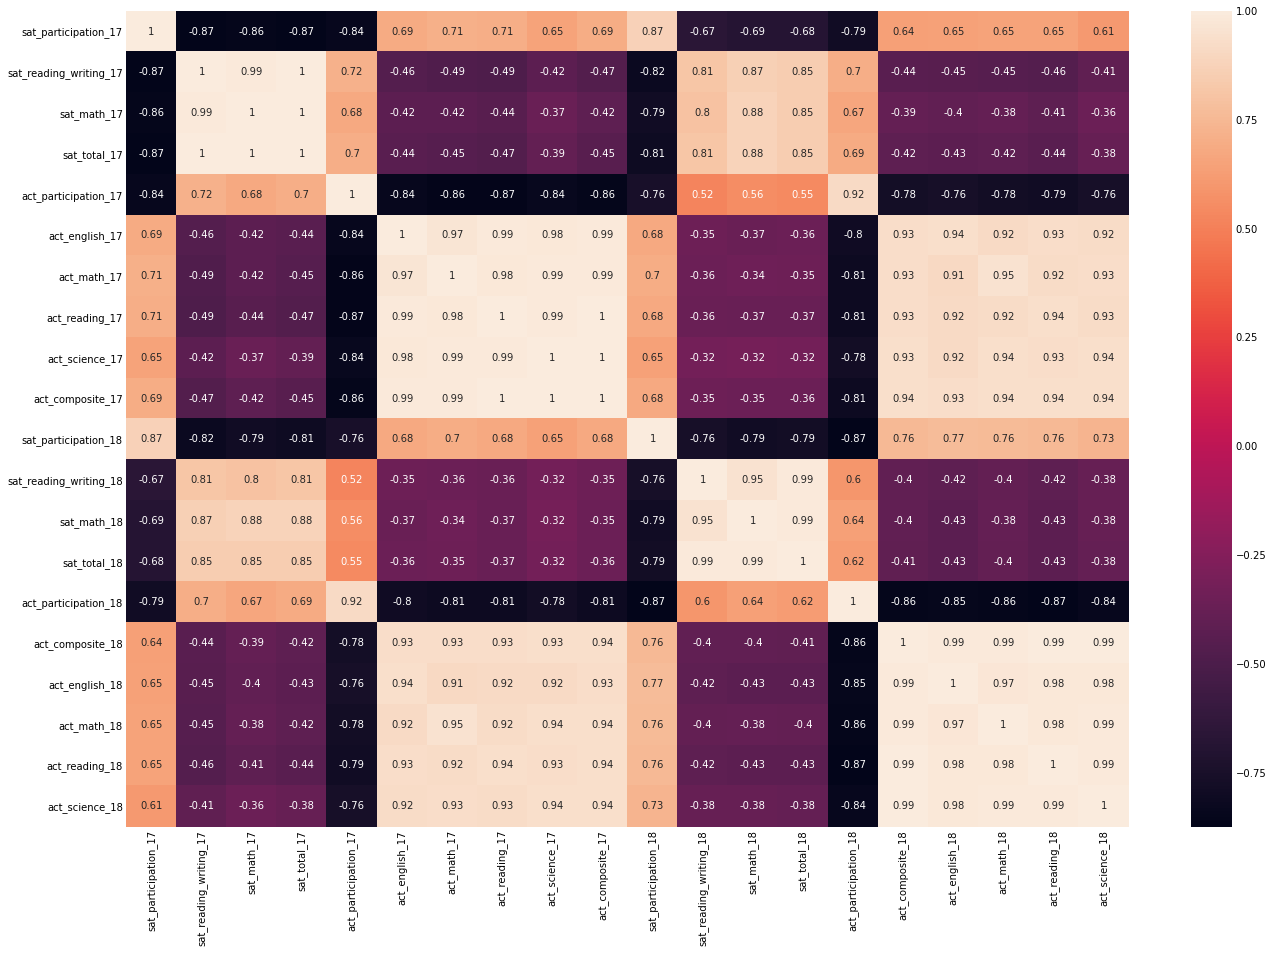

In [261]:
plt.figure(figsize=(20, 15))
sns.heatmap(final.corr(), annot=True);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [280]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, figsize_tuple, bins_range = None):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=figsize_tuple,nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=bins_range) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])# Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

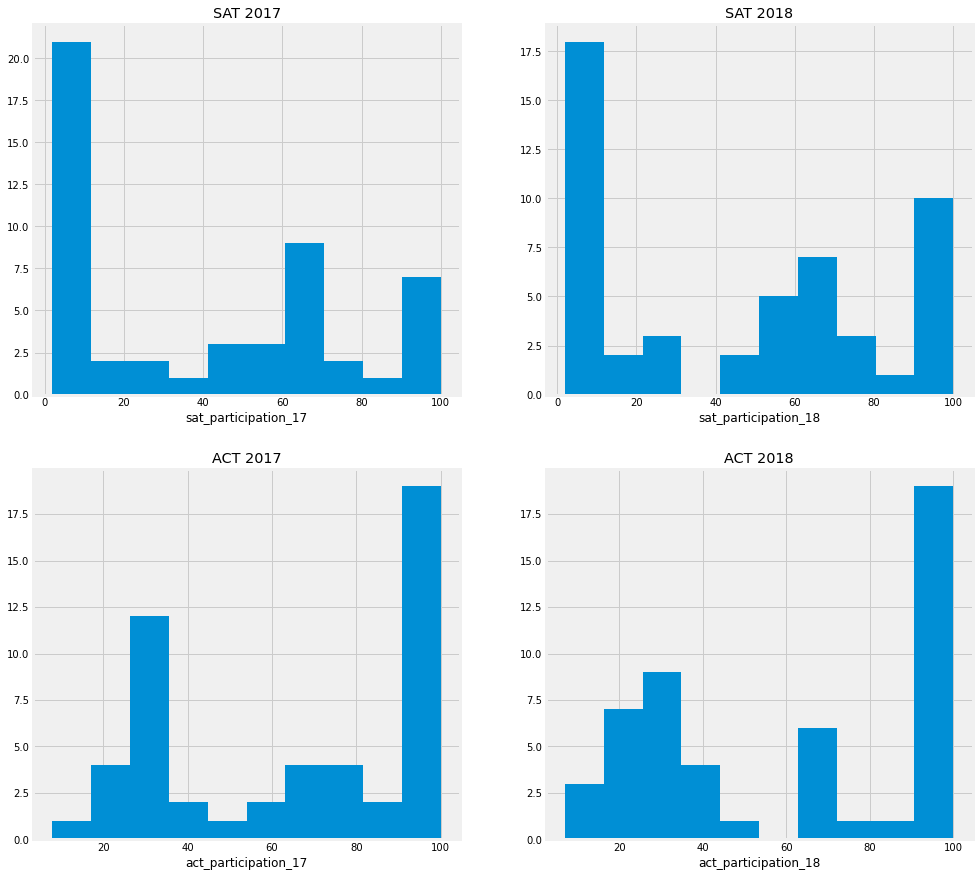

In [288]:
list_of_columns = ['sat_participation_17','sat_participation_18','act_participation_17','act_participation_18']

list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']

list_of_xlabels = [i for i in list_of_columns]  

subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, (15,15)
                   )

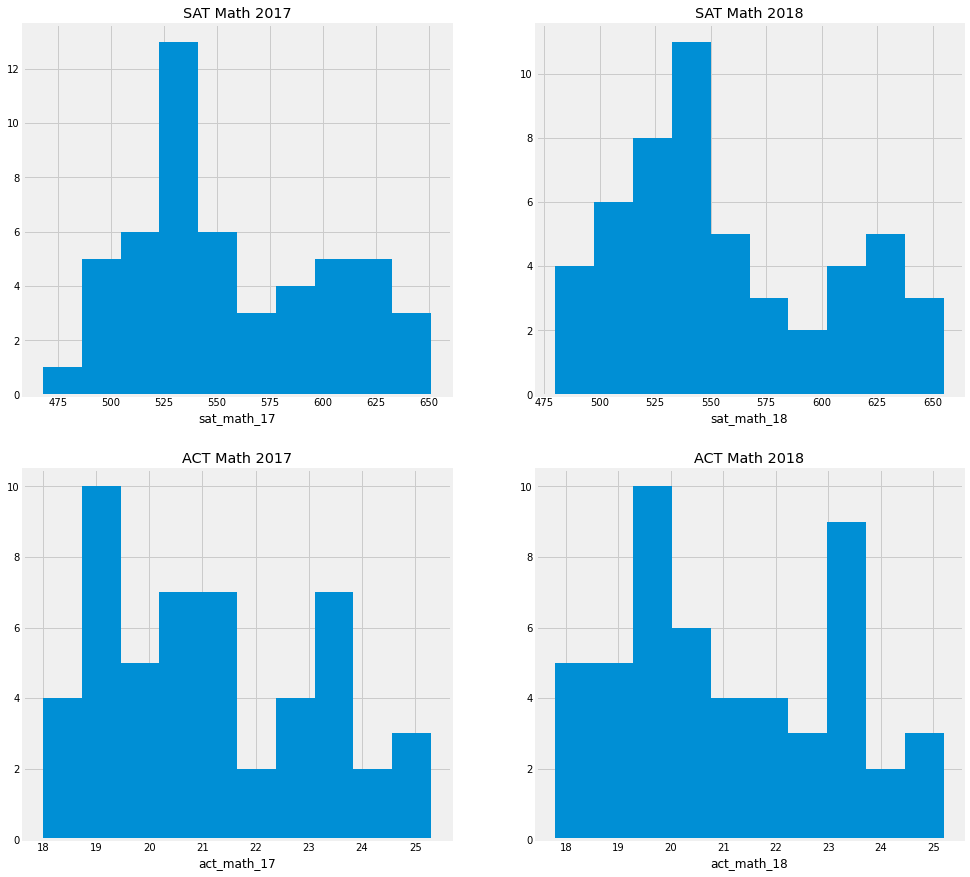

In [290]:
list_of_columns = ['sat_math_17','sat_math_18','act_math_17','act_math_18']

list_of_titles = ['SAT Math 2017','SAT Math 2018','ACT Math 2017','ACT Math 2018']

list_of_xlabels = [i for i in list_of_columns]  

subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, (15,15)
                   )

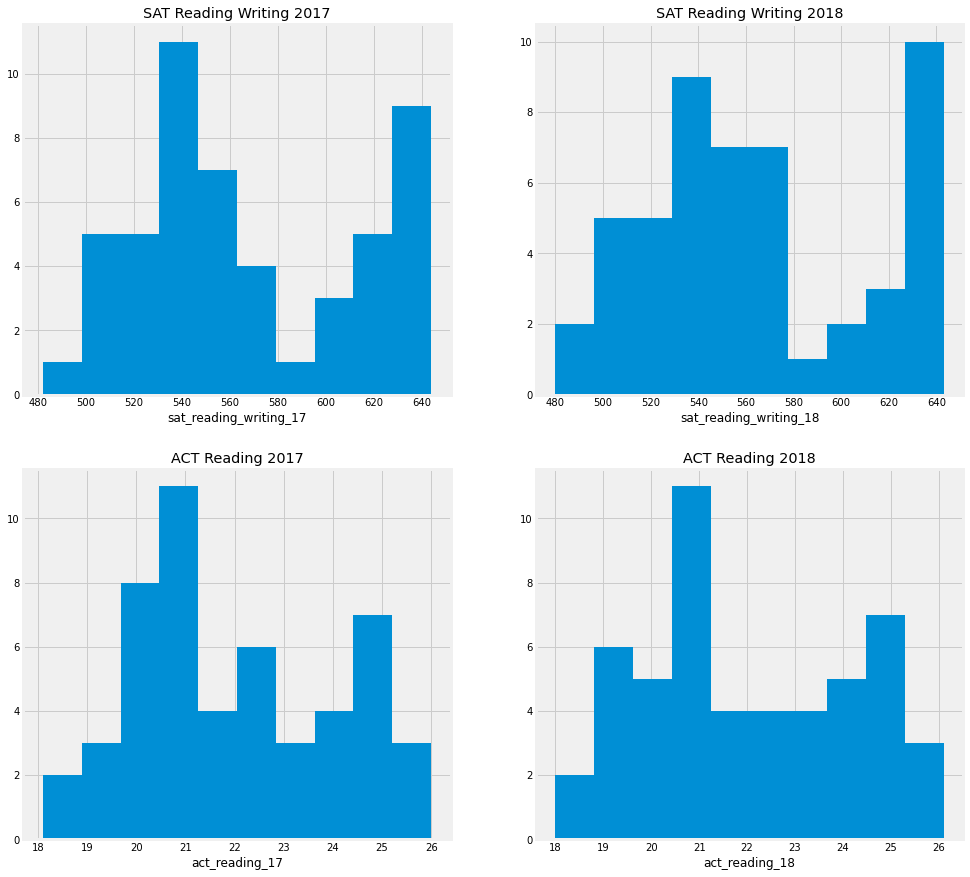

In [291]:
list_of_columns = ['sat_reading_writing_17','sat_reading_writing_18','act_reading_17','act_reading_18']

list_of_titles = ['SAT Reading Writing 2017','SAT Reading Writing 2018','ACT Reading 2017','ACT Reading 2018']

list_of_xlabels = [i for i in list_of_columns]  

subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, (15,15)
                   )

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0, 0.5, 'SAT Math 2017')

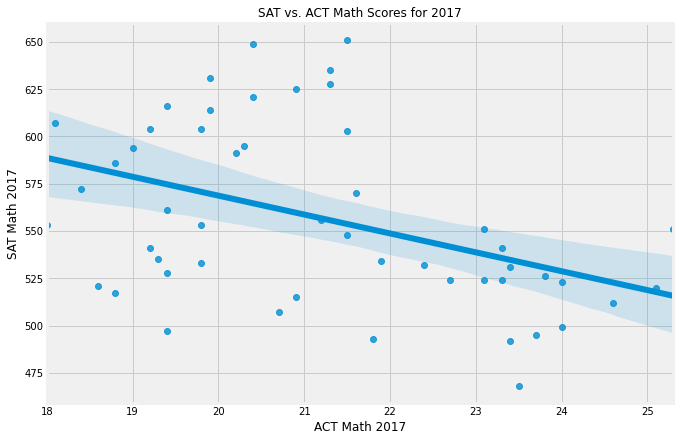

In [307]:
# Code

ax = plt.subplots(figsize=(10,7))
ax = sns.regplot(y='sat_math_17', x='act_math_17', data=final[['sat_math_17','act_math_17']])
ax.set_title('SAT vs. ACT Math Scores for 2017',fontsize=12)
ax.set_xlabel('ACT Math 2017',fontsize=12)
ax.set_ylabel('SAT Math 2017',fontsize=12)

Text(0, 0.5, 'SAT Reading & Writing 2017')

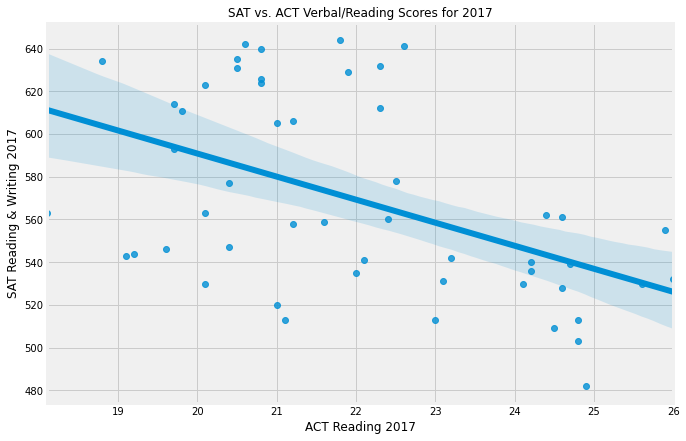

In [308]:
ax = plt.subplots(figsize=(10,7))
ax = sns.regplot(y='sat_reading_writing_17', x='act_reading_17', data=final[['sat_reading_writing_17','act_reading_17']])
ax.set_title('SAT vs. ACT Verbal/Reading Scores for 2017',fontsize=12)
ax.set_xlabel('ACT Reading 2017',fontsize=12)
ax.set_ylabel('SAT Reading & Writing 2017',fontsize=12)

Text(0, 0.5, 'SAT Total Score 2017')

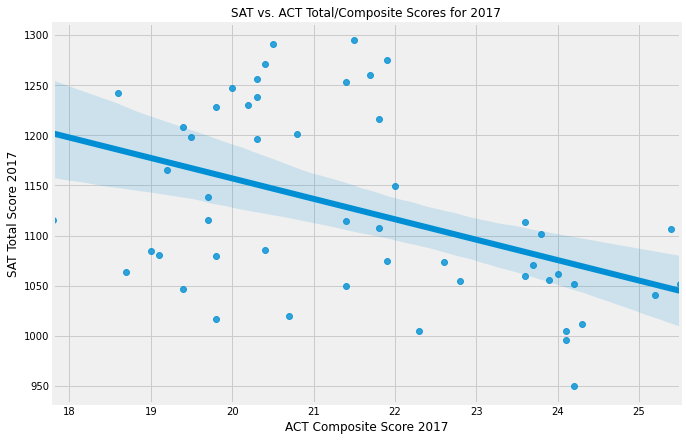

In [309]:
ax = plt.subplots(figsize=(10,7))
ax = sns.regplot(y='sat_total_17', x='act_composite_17', data=final[['sat_total_17','act_composite_17']])
ax.set_title('SAT vs. ACT Total/Composite Scores for 2017',fontsize=12)
ax.set_xlabel('ACT Composite Score 2017',fontsize=12)
ax.set_ylabel('SAT Total Score 2017',fontsize=12)

Text(0, 0.5, 'SAT Total 2017')

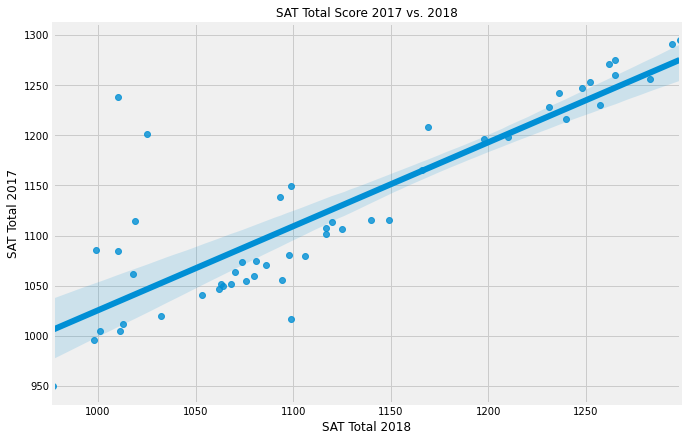

In [311]:
ax = plt.subplots(figsize=(10,7))
ax = sns.regplot(y='sat_total_17', x='sat_total_18', data=final[['sat_total_17','sat_total_18']])
ax.set_title('SAT Total Score 2017 vs. 2018',fontsize=12)
ax.set_xlabel('SAT Total 2018',fontsize=12)
ax.set_ylabel('SAT Total 2017',fontsize=12)

Text(0, 0.5, 'ACT Composite 2017')

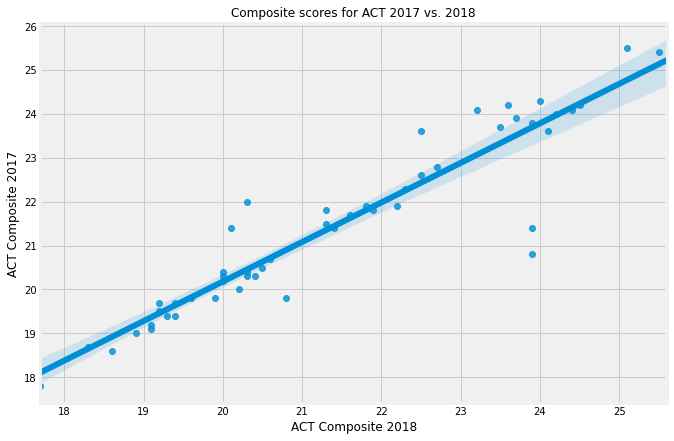

In [312]:
ax = plt.subplots(figsize=(10,7))
ax = sns.regplot(y='act_composite_17', x='act_composite_18', data=final[['act_composite_17','act_composite_18']])
ax.set_title('Composite scores for ACT 2017 vs. 2018',fontsize=12)
ax.set_xlabel('ACT Composite 2018',fontsize=12)
ax.set_ylabel('ACT Composite 2017',fontsize=12)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

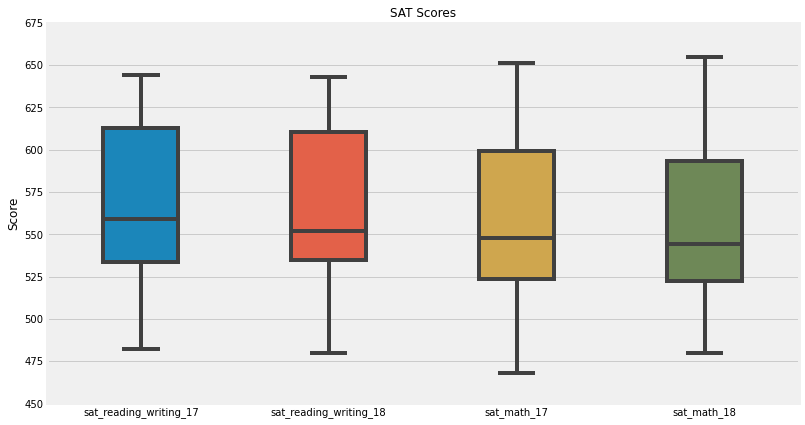

In [333]:
# Code

ax = plt.subplots(figsize=(12,7))
plt.title('SAT Scores',fontsize=12)
plt.ylabel('Score',fontsize=12)
plt.ylim(450, 675)
sns.boxplot(data=final[['sat_reading_writing_17','sat_reading_writing_18','sat_math_17','sat_math_18']],width=0.4)

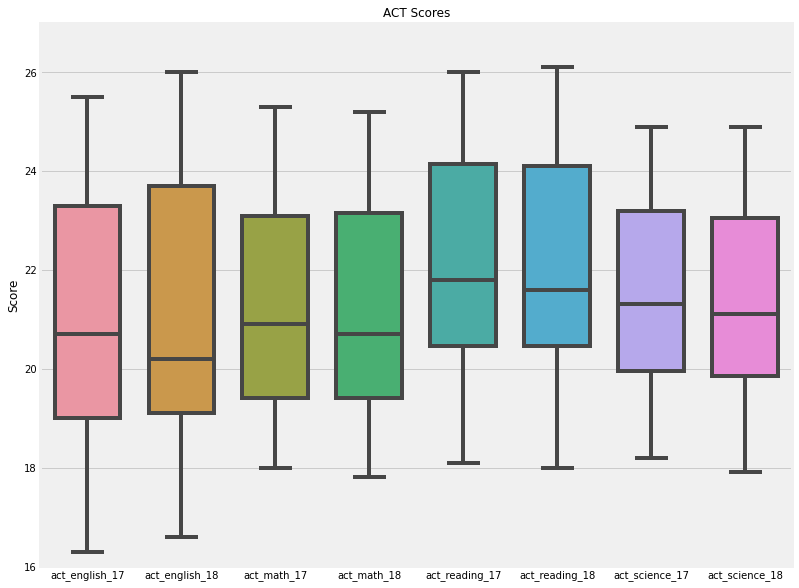

In [370]:
ax = plt.subplots(figsize=(12,10))
plt.title('ACT Scores',fontsize=12)
plt.ylabel('Score',fontsize=12)
plt.ylim(16, 27)

sns.boxplot(data=final[['act_english_17','act_english_18','act_math_17','act_math_18','act_reading_17','act_reading_18','act_science_17','act_science_18']],width=0.7)

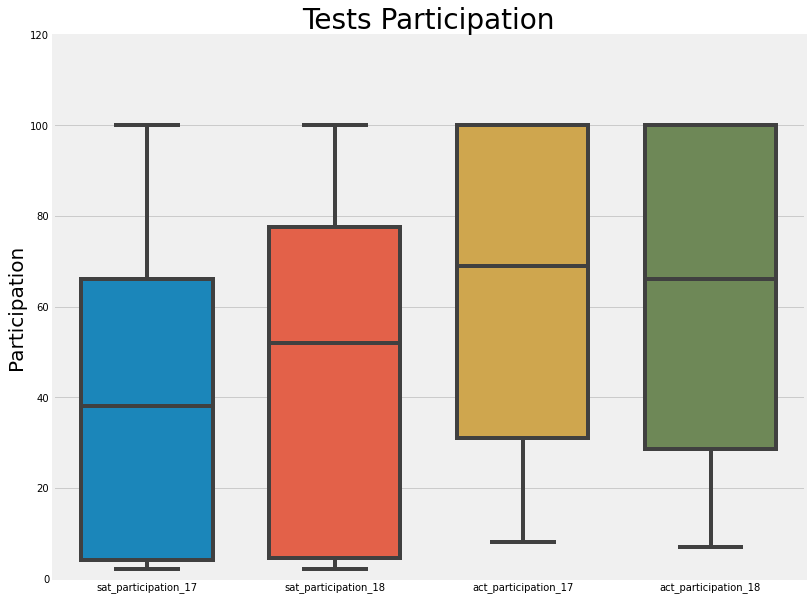

In [376]:
ax = plt.subplots(figsize=(12,10))
plt.title('Tests Participation',fontsize=28)
plt.ylabel('Participation',fontsize=20)
plt.ylim(0, 120)

sns.boxplot(data=final[['sat_participation_17','sat_participation_18','act_participation_17','act_participation_18']],width=0.7)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [377]:
# Answers:

t.T

,count,mean,std,min,25%,50%,75%,max
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_reading_writing_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_17,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: No, the assumpting does hold. Since some states have mandatory state requirement to require students to choose certain test, the distribution won't be normally distributed. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:
No, it doesn't make sense. As we are using participation rate in the analysis, but particiaption rate isn't able to represent the actual population size, hence there can be deviation.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: I don't think so, as these 2 tests have different scales calculating for the score. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?